In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import Normalizer,StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
from sklearn.decomposition import  PCA
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testing_data.csv to testing_data.csv
Saving training_data.csv to training_data.csv


In [ ]:
df_train = pd.read_csv('training_data.csv')
df_test = pd.read_csv('testing_data.csv')
df_train.drop(['ID'], axis=1, inplace=True)
test_id = df_test['ID']
df_test.drop(['ID'], axis=1, inplace=True)

In [ ]:
df_train.head()

,x-inv,y-inv,force
0,21.581582,-60.00000,223.592139
1,36.396396,-59.87988,220.539473
2,5.405405,-59.75976,222.776285
3,26.946947,-59.63964,207.157711
4,9.409409,-59.51952,205.724987


In [ ]:
df_train.describe()

,x-inv,y-inv,force
count,1.000000e+03,1.000000e+03,1000.000000
mean,1.769251e-15,1.634248e-16,72.209691
std,2.312868e+01,3.469303e+01,65.326105
min,-4.000000e+01,-6.000000e+01,-10.099132
25%,-2.000000e+01,-3.000000e+01,13.954386
50%,0.000000e+00,0.000000e+00,54.800617
75%,2.000000e+01,3.000000e+01,121.912166
max,4.000000e+01,6.000000e+01,223.592139


In [ ]:
df_train.isnull().sum()

x-inv    0
y-inv    0
force    0
dtype: int64

In [ ]:
df_train.index[df_train.duplicated()]

Int64Index([], dtype='int64')

Checking for outliers

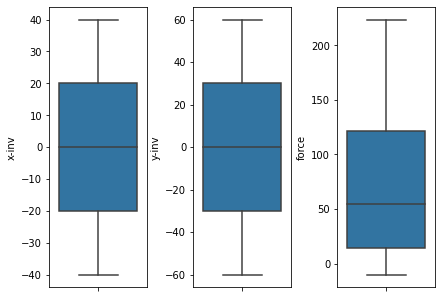

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3)
index = 0
ax = ax.flatten()

for x in df_train.columns:
    sns.boxplot(y=x, data=df_train, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.4, h_pad=3.0)

Distribution plots for features.

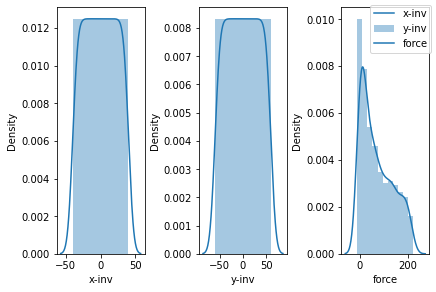

In [ ]:
warnings.filterwarnings("ignore")
fig,ax = plt.subplots(nrows=1, ncols=3)
index = 0
ax = ax.flatten()

for x in df_train.columns:
    sns.distplot(df_train[x], ax=ax[index])
    index += 1
fig.legend(labels=df_train.columns)
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)

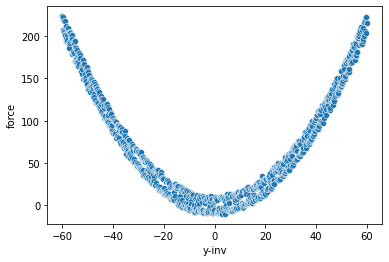

In [ ]:
sns.scatterplot(x=df_train['y-inv'], y=df_train['force'])

,x-inv,y-inv,force
0,21.581582,-60.00000,223.592139
1,36.396396,-59.87988,220.539473
2,5.405405,-59.75976,222.776285
3,26.946947,-59.63964,207.157711
4,9.409409,-59.51952,205.724987


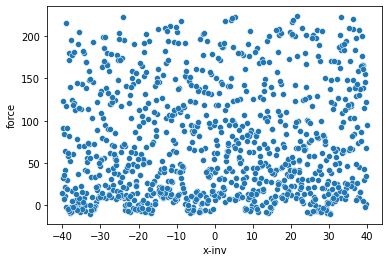

In [ ]:
sns.scatterplot(x=df_train['x-inv'], y=df_train['force'])
df_train.head()

In [ ]:
x = df_train.drop('force' , axis  = 1)
y = df_train['force']

Adding Polynomial Features for the two features.

In [ ]:
poly_x = PolynomialFeatures(degree = 23)
xinv = poly_x.fit_transform(x['x-inv'].to_numpy().reshape(-1,1))

xinv_test = poly_x.fit_transform(df_test['x-inv'].to_numpy().reshape(-1,1))

poly_y = PolynomialFeatures(degree = 2)
yinv = poly_y.fit_transform(x['y-inv'].to_numpy().reshape(-1,1))

yinv_test = poly_y.fit_transform(df_test['y-inv'].to_numpy().reshape(-1,1))


In [ ]:
x = np.concatenate([xinv , yinv] , axis = 1)
df_test = np.concatenate([xinv_test , yinv_test],  axis = 1)

In [ ]:
x.shape

(1000, 27)

In [ ]:
x_train , x_test  ,y_train , y_test = train_test_split(x , y ,random_state = 100, shuffle=True, train_size=0.8)

Using Linear Regression with regularization(L2)

In [ ]:
model = Ridge(alpha = 0.01)
model.fit(x_train,y_train)
preds = model.predict(x_test)
print(mean_squared_error(y_test ,preds))

8.024445975474404


In [ ]:
test_pred = model.predict(df_test)

In [ ]:
outcome = pd.DataFrame(test_pred)
result = pd.concat([test_id,outcome], axis=1)
result.columns = ['ID','force']
result.to_csv('result.csv',encoding='utf-8', columns=['ID','force'], index=False)
result

,ID,force
0,0,211.416180
1,1,225.042415
2,2,210.812402
3,3,207.009227
4,4,208.106402
...,...,...
9995,9995,218.587162
9996,9996,213.080785
9997,9997,226.135175
9998,9998,224.553087
